# Prediction Using Unsupervised ML (GRIP Task - 2)

# Jinendra Rajesh Kulkarni

# Data Science and Business Analytics Intern

# Step 1 - Importing Necessary Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Step 2 - Reading Dataset

In [96]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Visualizing and Discovering Dataset

In [97]:
data.shape

(150, 6)

In [98]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [85]:
data = data.drop(['Id'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Visualizing Data

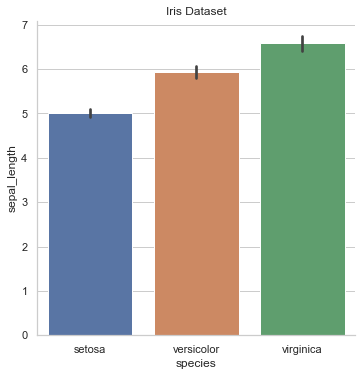

In [86]:
sns.set_theme(style="whitegrid")
iris_data = sns.load_dataset('iris')
i_data = sns.catplot(data=iris_data, kind="bar", x="species", y="sepal_length")
plt.title("Iris Dataset")
plt.show()

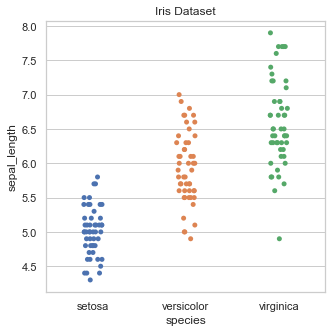

In [87]:
sns.set_theme(style="whitegrid")
iris_data = sns.load_dataset('iris')
sns.stripplot(x="species", y="sepal_length", data=iris_data)
plt.title("Iris Dataset")
plt.show()

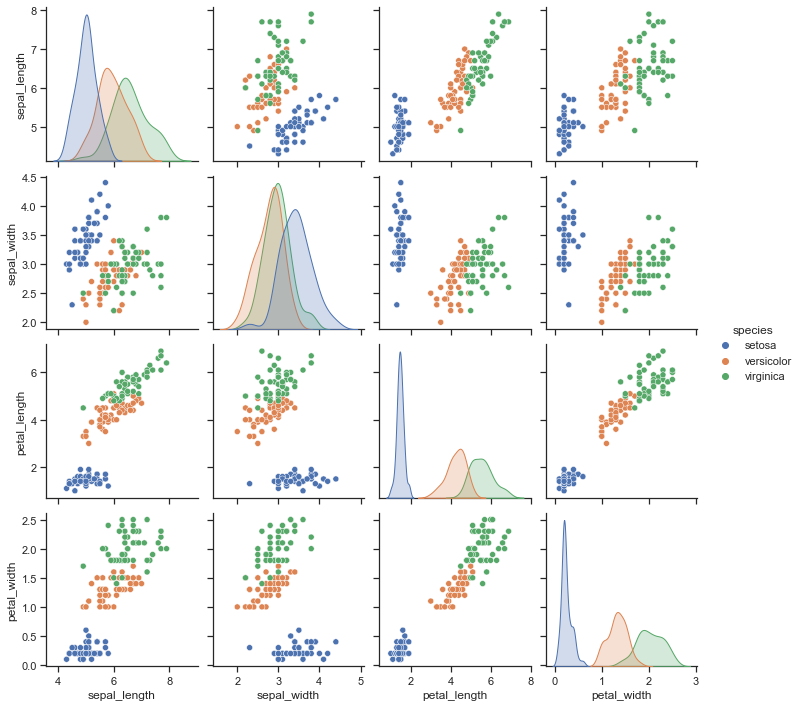

In [88]:
sns.set_theme(style="ticks")
iris_data = sns.load_dataset('iris')
sns.pairplot(iris_data, hue="species")

<AxesSubplot:>

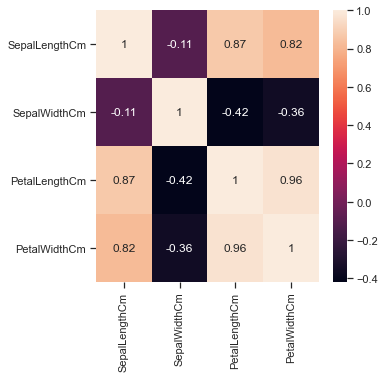

In [89]:
sns.heatmap(data.corr(), annot=True)

In [90]:
data = data.drop(['Species'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# Step 4 - To find optimum number of clusters using K-means clustering (Elbow Method)

In [91]:
x = data.iloc[:,[0,2]].values

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    print("k : ", i, "WCSS : ", kmeans.inertia_)

k :  1 WCSS :  566.0320666666667
k :  2 WCSS :  112.9626273148148
k :  3 WCSS :  53.80135119312653
k :  4 WCSS :  34.3144207792208
k :  5 WCSS :  25.63146450956451
k :  6 WCSS :  21.972121094591685
k :  7 WCSS :  18.363797135772778
k :  8 WCSS :  15.200959956709955
k :  9 WCSS :  13.392435559006216
k :  10 WCSS :  11.709795011793139


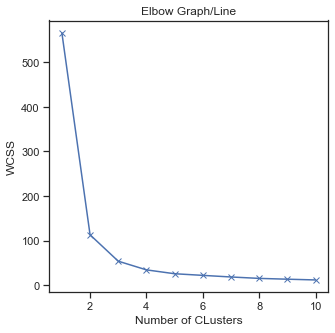

In [92]:
plt.plot(range(1,11), wcss, 'bx-')
plt.title("Elbow Graph/Line")
plt.xlabel("Number of CLusters")
plt.ylabel("WCSS")
plt.show()
sns.set(rc={'figure.figsize':(5,5)})

# The optimum number of clusters is where the Elbow occurs

# From the above graph, we considered the number of clusters as 3

In [93]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


# Visualizing Clusters

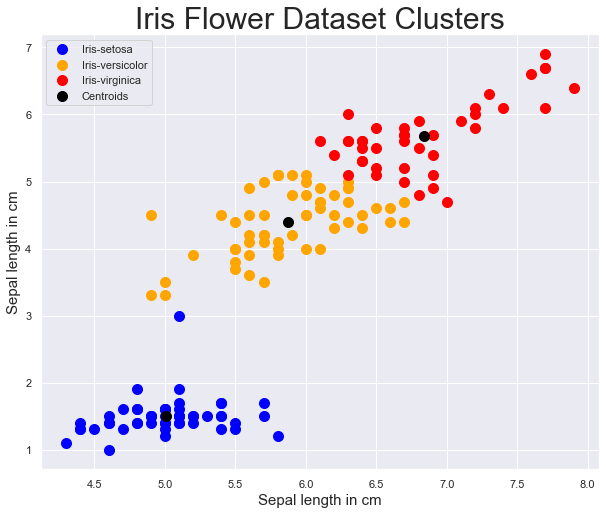

In [94]:
plt.figure(figsize=(10,8))

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='Blue', label='Iris-setosa')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='Orange', label='Iris-versicolor')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='Red', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='Black', label='Centroids')


plt.legend(loc="best")
plt.title("Iris Flower Dataset Clusters", fontsize=30)
plt.xlabel("Sepal length in cm", fontsize=15)
plt.ylabel("Sepal length in cm", fontsize=15)
plt.show()